# K - Means Clustering

1. Attempts to split data into K groups that are closest to K centroids
2. Unsupervised Learning - uses only the positions of each data point
3. Can uncover Interesting groupings of people /things/behaviour

... Example : Where do Millionaries live.

... What genres of music/movies/etc. naturally fall out of data?

... Create your own stereotypes from demographic data

How it Works

1. Randomly pick K - Centroids (K - means).
2. Assign each data point to the centroid it's closet to.
3. Recompute the centroids based on the average position of each centroid's point.
4. Iterate until points stop changing assignments to centroids.

If you want to predict the cluster for new points, just find the centroid they're closet to.

### Choosing K

1. Try increasing K values until you stop getting large reductions in squared error.(distances from each point to their centroids.)

### Avoiding Local Minima

1. The random choice of initial centroids can yield different results.
2. Run it a few times just to make sure your initial results are not wacky.

### Labeling the clusters.

1. K-means doesn't attempt to assign any meaning to the clusters you find.
2. It's up to you to dig into the data and try to determine that.

### K - Means Clustering Examples

Let's Make some fake data that includes people clustered by income and age, randomly


In [24]:
#Create fake income/age clusters for N people in k clusters
import numpy as np

def createClusteredData(peoples, clusters):
    np.random.seed(10)
    pointsPerCluster = float(peoples)/clusters
    x = []
    for i in range(clusters):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            # np.random.normal(incomeCentroid, std deviation)
            x.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
    x = np.array(x)
    return x

In [23]:
createClusteredData(2000, 200)

array([[1.72153581e+05, 2.24681554e+01],
       [1.43383713e+05, 2.10208298e+01],
       [1.65051076e+05, 1.95974263e+01],
       ...,
       [6.76342344e+04, 6.47695491e+01],
       [9.08264319e+04, 6.21434305e+01],
       [9.60798820e+04, 6.49662186e+01]])

#### We will use K-means to rediscover these clusters in unsupervised learning:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


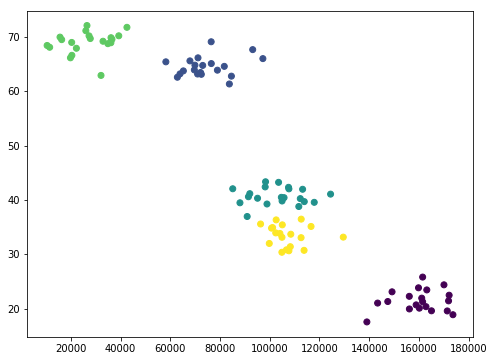

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

data = createClusteredData(100, 5)

model = KMeans(n_clusters = 5)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(scale(data))

# We can look at the clusters each data point was assigned to
print(model.labels_)


# We will Visualize it

plt.figure(figsize = (8, 6))
plt.scatter(data[:,0], data[:,1], c = model.labels_.astype(np.float))
plt.show()